# 사이킷런의 PCA 기능
### data science study pg 234~238
~~~ 
사이킷런의 decomposition 서브패키지는 PCA 분석을 위한 PCA class를 제공한다.
~~~
* 입력인수
    - n_components: 정수
* 매서드:
    - fit_transform(): 특징행렬을 낮은 차원의 근사행렬로 변환
    - inverse_transform(): 변환된 근사행렬을 원래의 차원으로 복귀
* 속성:
    - mean_: 평균벡터
    - components_: 주성분 벡터

### 붓꽃 데이터를 1차원으로 차원축소(근사)하는 예제 코드
~~~
fit_transform() 메서드로 구한 X_low는 1차원 근사 데이터의 집합이다. 이 값을 다시 inverse_transform() 메서드에 넣어서 구한 X2는 다시 2차원으로 복귀한 근사 데이터의 집합이다.
~~~

In [2]:
from sklearn.decomposition import PCA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()

N=10                       #앞의 10송이만 선택
X=iris.data[:N, :2]        #10개의 꽃의 특징 2가지 갖고옴

Text(0.5, 1.0, 'reduction into 1 dimension (Iris data)')

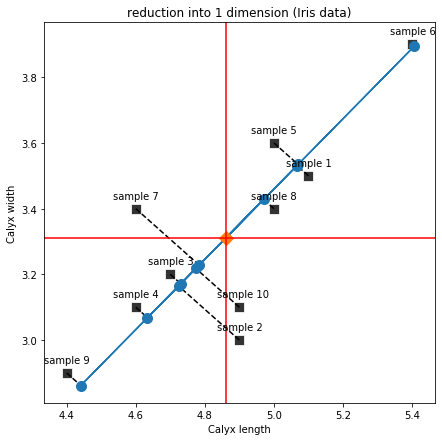

In [7]:
pca1=PCA(n_components=1)            #n_components가 아마 차원을 지정하는 것 같음 (값이 1이니까 1차원)
X_low=pca1.fit_transform(X)         #특징행렬을 낮은 차원의 근사행렬으로 변환
X2=pca1.inverse_transform(X_low)    #변환된 근사행렬을 원래 행렬으로 복귀 

plt.figure(figsize=(7, 7))
ax=sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color='.2', marker='s')
#scatterplot(산점도): 직교 좌표계를 이용해 두 개 변수 간의 관계를 나타낸다

#서로 다른 차원을 검은색 점선으로 연결
for i in range(N):
    d=0.03 if X[i, 1] else -0.04
    ax.text(X[i, 0]-0.065, X[i, 1]+d, 'sample {}'.format(i+1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], 'k--')          #검은색 점선을 1차원 값에서 원래 차원의 위치로 귿기

plt.plot(X2[:, 0], X2[:, 1], 'o-', markersize=10)                      #'o-'는 circle (파란색 원들의 위치)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker='D')    # marker='D' 는 다이아몬드 모양(중앙에 하나있는 주황색 사각형)
#X[:, 0].mean() 는 모든 꽃들의 꽃받침 길이의 평균인 것 같음
#X[:, 1].mean() 는 모든 꽃들의 꽃받침 폭의 평균인 것 같음

plt.axvline(X[:, 0].mean(), c='r')       #빨간색 세로 직선: c='r'는 색을 빨간색으로 지정
plt.axhline(X[:, 1].mean(), c='r')       #빨간색 가로 직선

plt.grid(False)                      #그래프 안의 모눈종이(?) 같은 선 없음
plt.xlabel('Calyx length')           # '꽃받침 길이'
plt.ylabel('Calyx width')            # '꽃받침 폭'
plt.title('reduction into 1 dimension (Iris data)')

In [8]:
pca1.mean_                #데이터의 평균값

array([4.86, 3.31])

In [9]:
pca1.components_         #주성분 벡터 (가장 근사 데이터를 만드는 단위기저벡터) 구하기

array([[0.68305029, 0.73037134]])

In [12]:
X0=X-X.mean(axis=0)
U, S, VT=np.linalg.svd(X0)     #특잇값 분해(vector13): 왼쪽 특이벡터, 특잇값, 오른쪽 특이벡터
VT                             #오른쪽 특이벡터

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [13]:
VT[:, 0]

array([-0.68305029, -0.73037134])

### 고윳값분해를 할 때 넘파이가 고윳값의 순서에 따른 정렬을 해주지 않으므로 사용자가 정렬해야 한다. 
**아직 이해 못함**

In [14]:
XCOV=X0.T@X0
W, V=np.linalg.eig(XCOV)

In [15]:
W

array([0.17107711, 1.44192289])

In [16]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [17]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

**8 번째 꽃의 꽃받침 길이와 꽃받침 폭**

In [18]:
X[7, :]

array([5. , 3.4])

**PCA로 구한 주성분의 값 (=꽃의 크기)**

In [19]:
X_low[7]

array([0.16136046])

In [20]:
pca1.components_@(X[7, :]-pca1.mean_)     #위와 같은 값을 구하는 다른 방법

array([0.16136046])

**이 주성분 값을 이용하여 다시 2차원 값으로 나타낸 근사값**

In [21]:
X2[7, :]

array([4.97021731, 3.42785306])

~~~
아래 링크의 내용도 공부 시 참조하기
~~~
https://excelsior-cjh.tistory.com/167

### pca1=PCA(n_components=1) 에서 n_components 값만 바꾼 결과

Text(0.5, 1.0, 'reduction into 1 dimension (Iris data)')

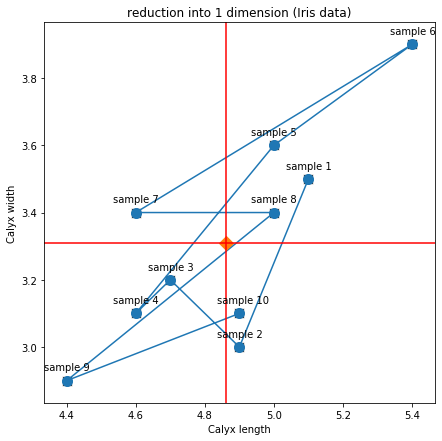

In [22]:
pca1=PCA(n_components=2)
X_low=pca1.fit_transform(X)
X2=pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax=sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color='.2', marker='s')

for i in range(N):
    d=0.03 if X[i, 1] else -0.04
    ax.text(X[i, 0]-0.065, X[i, 1]+d, 'sample {}'.format(i+1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], 'k--')

plt.plot(X2[:, 0], X2[:, 1], 'o-', markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker='D')

plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')

plt.grid(False)
plt.xlabel('Calyx length')           # '꽃받침 길이'
plt.ylabel('Calyx width')            # '꽃받침 폭'
plt.title('reduction into 1 dimension (Iris data)')

### 3.5.1 연습문제)
~~~
붓꽃 데이터 중 앞에서 데이터 50개에 대해 다음 문제를 풀어라
~~~

#### 1) 꽃잎의 길이와 꽃잎의 폭을 이용하여 1차원 PCA를 수행하라. 꽃의 크기는 꽃잎 길이와 꽃잎 폭의 어떤 선형조합으로 나타나는가?
~~~
답: 꽃의 크기=(0.96 꽃잎의 길이)+(0.28 꽃잎의 폭)
~~~

In [33]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

X=load_iris().data
pca=PCA(n_components=1)
pca.fit_transform(X[:50, 2:])
pca.components_                  #주성분벡터

array([[0.96004653, 0.27984043]])

#### 2) 꽃받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형조합으로 나타나는가?
~~~
답: 꽃의 크기=(0.67 꽃ㅊ받침의 길이)+(0.73 꽃받침의 폭)+(0.10 꽃잎의 길이)+(0.06 꽃잎의 폭)
~~~

In [34]:
pca=PCA(n_components=1)
pca.fit_transform(X[:50, :])
pca.components_                   #주성분벡터

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])